In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
from math import ceil
from PIL import Image
from com import compress_img

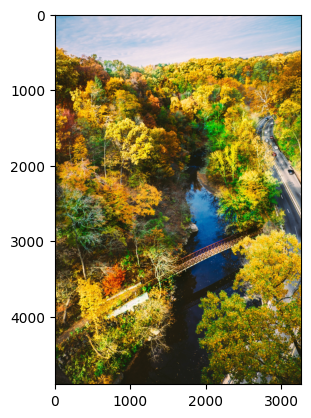

In [69]:
img = Image.open("sample1.jpg")
wid=img.width
hei=img.height
img = cv2.cvtColor(cv2.imread('sample1.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [54]:
img.shape


(4896, 3264, 3)

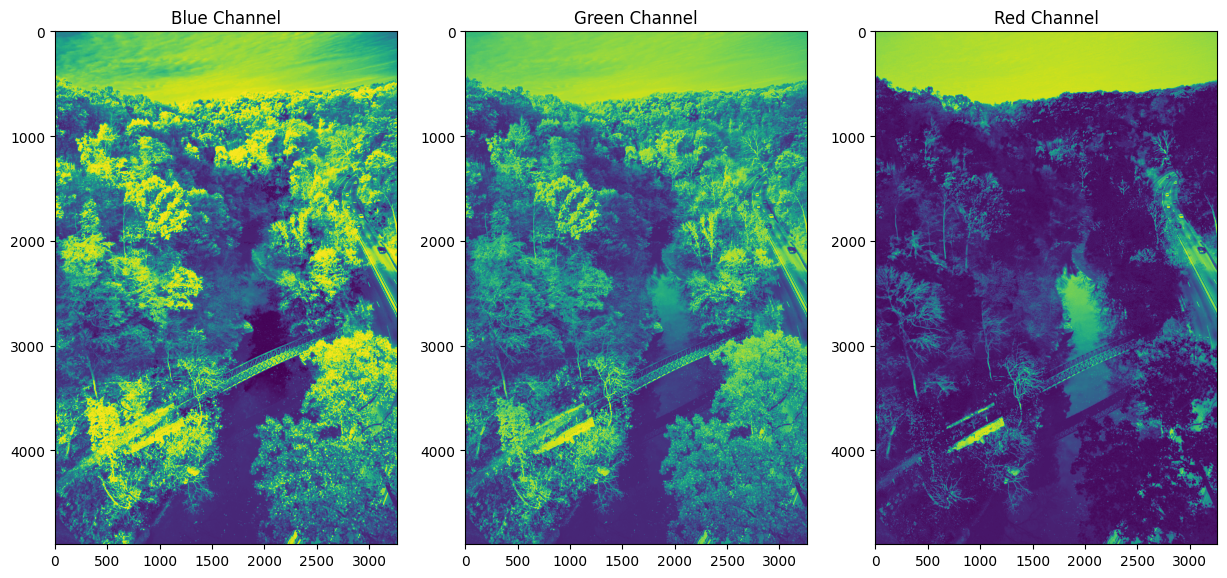

In [55]:
#Splitting into channels
blue, green, red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize=(15, 7.2))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()


In [56]:
blue_temp_df = pd.DataFrame(data=blue)
blue_temp_df


,0,1,2,3,4,5,6,7,8,9,...,3254,3255,3256,3257,3258,3259,3260,3261,3262,3263
0,131,112,104,106,109,119,121,110,110,111,...,105,97,117,94,100,85,79,97,92,93
1,108,99,100,101,95,102,112,110,107,105,...,103,91,125,106,116,102,94,108,96,90
2,107,101,106,108,102,109,119,117,110,103,...,100,88,112,100,116,106,100,114,97,87
3,119,108,108,114,114,121,123,113,113,103,...,100,92,86,79,100,91,90,111,98,86
4,111,101,104,109,105,107,108,97,109,99,...,102,101,86,80,98,83,83,111,102,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,34,34,34,33,31,29,26,24,34,34,...,56,65,77,94,126,155,161,149,139,135
4892,32,34,36,38,39,38,37,36,46,44,...,47,56,69,90,124,158,172,162,146,144
4893,29,33,40,46,52,55,56,56,50,48,...,41,49,65,76,98,134,162,156,134,125
4894,31,35,41,47,51,53,53,52,44,42,...,41,50,67,73,82,112,142,141,125,123


In [57]:
df_blue = blue/255
df_green = green/255
df_red = red/255


In [58]:
# Taking little over 30% of the total number of colours present in the entire colour spectrum of image
# reduce the size of image needed
print('Number of distinct reds present: ', df_red.shape[0])
print('Number of distinct blues present: ',df_blue.shape[0])
print('Number of distinct greens present: ', df_green.shape[0])

red_components = ceil((df_red.shape[0]/1000))*300
blue_components = ceil((df_blue.shape[0]/1000))*300
green_components = ceil((df_green.shape[0]/1000))*300
# print(red_components)

Number of distinct reds present:  4896
Number of distinct blues present:  4896
Number of distinct greens present:  4896


In [59]:
pca_b = PCA(n_components=blue_components)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=green_components)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=red_components)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)


In [60]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)


(4896, 1500)
(4896, 1500)
(4896, 1500)


In [61]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")


Blue Channel : 0.9968140800791885
Green Channel: 0.9959321729509312
Red Channel  : 0.9971854923917834


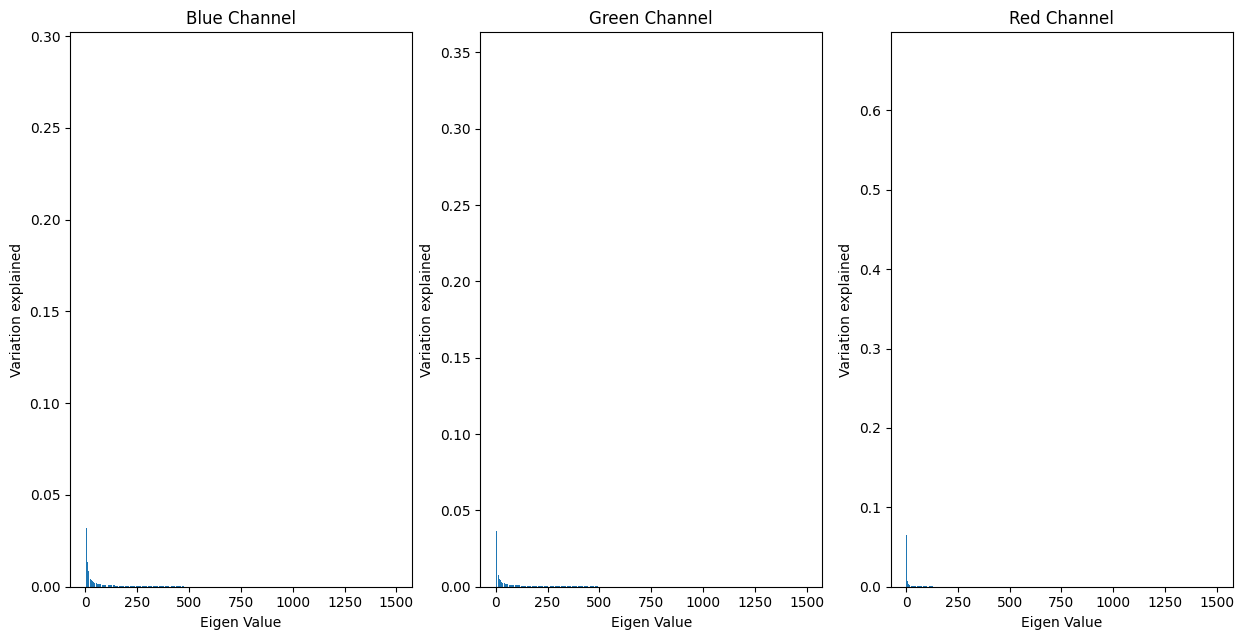

In [62]:
fig = plt.figure(figsize=(15, 7.2))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1, blue_components+1)), pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1, green_components+1)), pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1, red_components+1)), pca_r.explained_variance_ratio_)
plt.show()


In [63]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)


(4896, 3264) (4896, 3264) (4896, 3264)


In [64]:
img_reduced = (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)


(4896, 3264, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


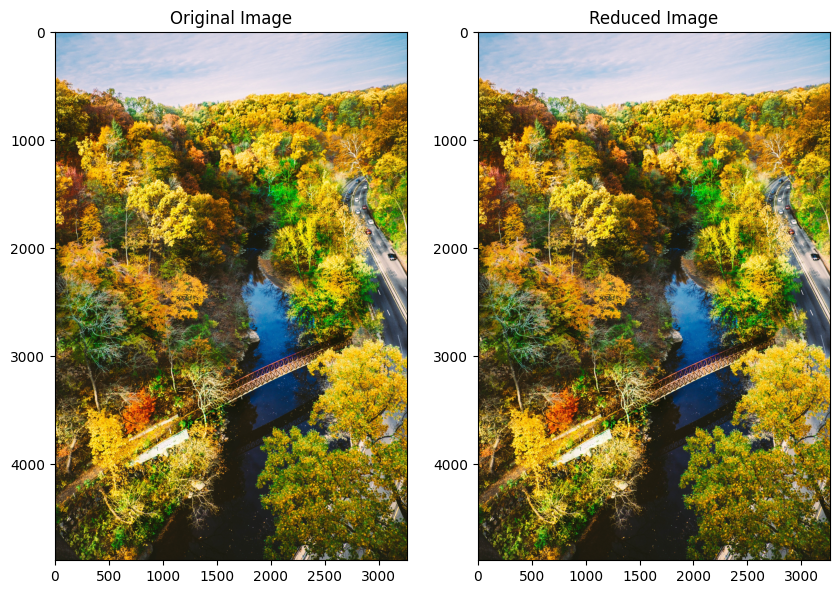

In [65]:
fig = plt.figure(figsize=(10, 7.2))
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


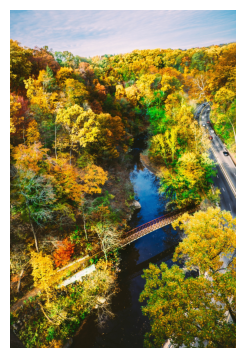

In [72]:
fig = plt.figure(figsize=(wid//100, hei//100))
# saving with original dimensions
fig.add_subplot(122)
# plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.axis("off")
# plt.show()
plt.savefig("pca_compressed.jpg", bbox_inches=0, transparent=True)
compress_img("sample1.jpg")